<div style="text-align: center;"><b>ECMM447 - Social Networks and Text Analysis</b></div>

<div style="text-align: center;"><b>Coursework - Mini Project Code - Python Notebook</b></div>

This notebook contains the code developed for this **Social Network & Text Analysis** mini project along with the data preparation process of the Game of Thrones Script data.

**Data Preparation:**

Importing all the required python packages used in this project:

In [1]:
from pathlib import Path
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import punkt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.image as mpimg

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lets load the initial version of raw data of Game of Thrones Script data into a Pandas Dataframe.

In [2]:
# Get script directory
script_dir = Path("Project Code.ipynb").resolve()

# Getting the relative path to folder Dataset
file_path = script_dir.parent / "Dataset" / "Game_of_Thrones_Script.csv"

# Loading the raw script data of GoT into Pandas Dataframe
all_seasons_data = pd.read_csv(file_path)
all_seasons_data

Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sentence  
0      What do you expect? They're savages. One lot s...  
1      I've never seen wildlings do a thing like this...  
2                                 How close did you get?  
3                                Close as any man would.  
4                       We should head back to the wall.  
...                                                  ...  
23906  I think we can all agree that ships take prece...  
23907      I think that's a very presumptuous statement.  
23908  I once brought a jackass and a honeycomb into ...  
23909                            The Queen in the North!  
23910  The Queen in the North! The Queen in the North...  

[23911 rows x 6 columns]

---

### **Text Analysis:**

In the above all seasons data , we have the entire dialogues spoken by all characters in the Game of Thrones web series in the **Sentence column**.

With the Sentence column and its data, we are going to determine the **impact of Antagonist Fictional character - White Walkers** among the other characters even in their absence by analyzing the usage of the famous sentence **"Winter is coming!"** and its various parts of speech.

In [3]:
# Let create the corpus from the all_seasons_data

corpus = []
for index, row in all_seasons_data.iterrows():
    sentence = str(row.Sentence).lower().strip()
    corpus.append(sentence)

In [4]:
# List of famous dialogue in the Game of Throne season about White Walkers

night_king_list = ['winter is coming','winter is here',
                   'winter may be coming','winter is truly coming',
                   'walkers','winter comes',
                   'white walkers','winter does come', 'winter coming'
                   ]

**N-GRAMS:**

Lets use the CountVectorizer to list the **N-grams** from the Interaction/Sentence and find out the frequency of the famous dialogue **"Winter is Coming!"** which infers the impact and fear of White Walkers without the presence in the **Game of thrones** season1.

In [5]:
# Let initialize the CountVectorizer for the N-gram range
vectorizer1 = CountVectorizer(analyzer='word',ngram_range=(1,4))

# Let fit the corpus using the vectorizer
X1 = vectorizer1.fit_transform(corpus)

# Extract the feature names
feature_names = vectorizer1.get_feature_names_out()
count_dict = {}
for ngram in night_king_list:
    if ngram in feature_names:
        index = list(feature_names).index(ngram)
        count = X1[:, index].sum()
        count_dict[ngram] = count

# Let sort the count dict 
sorted_data = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))


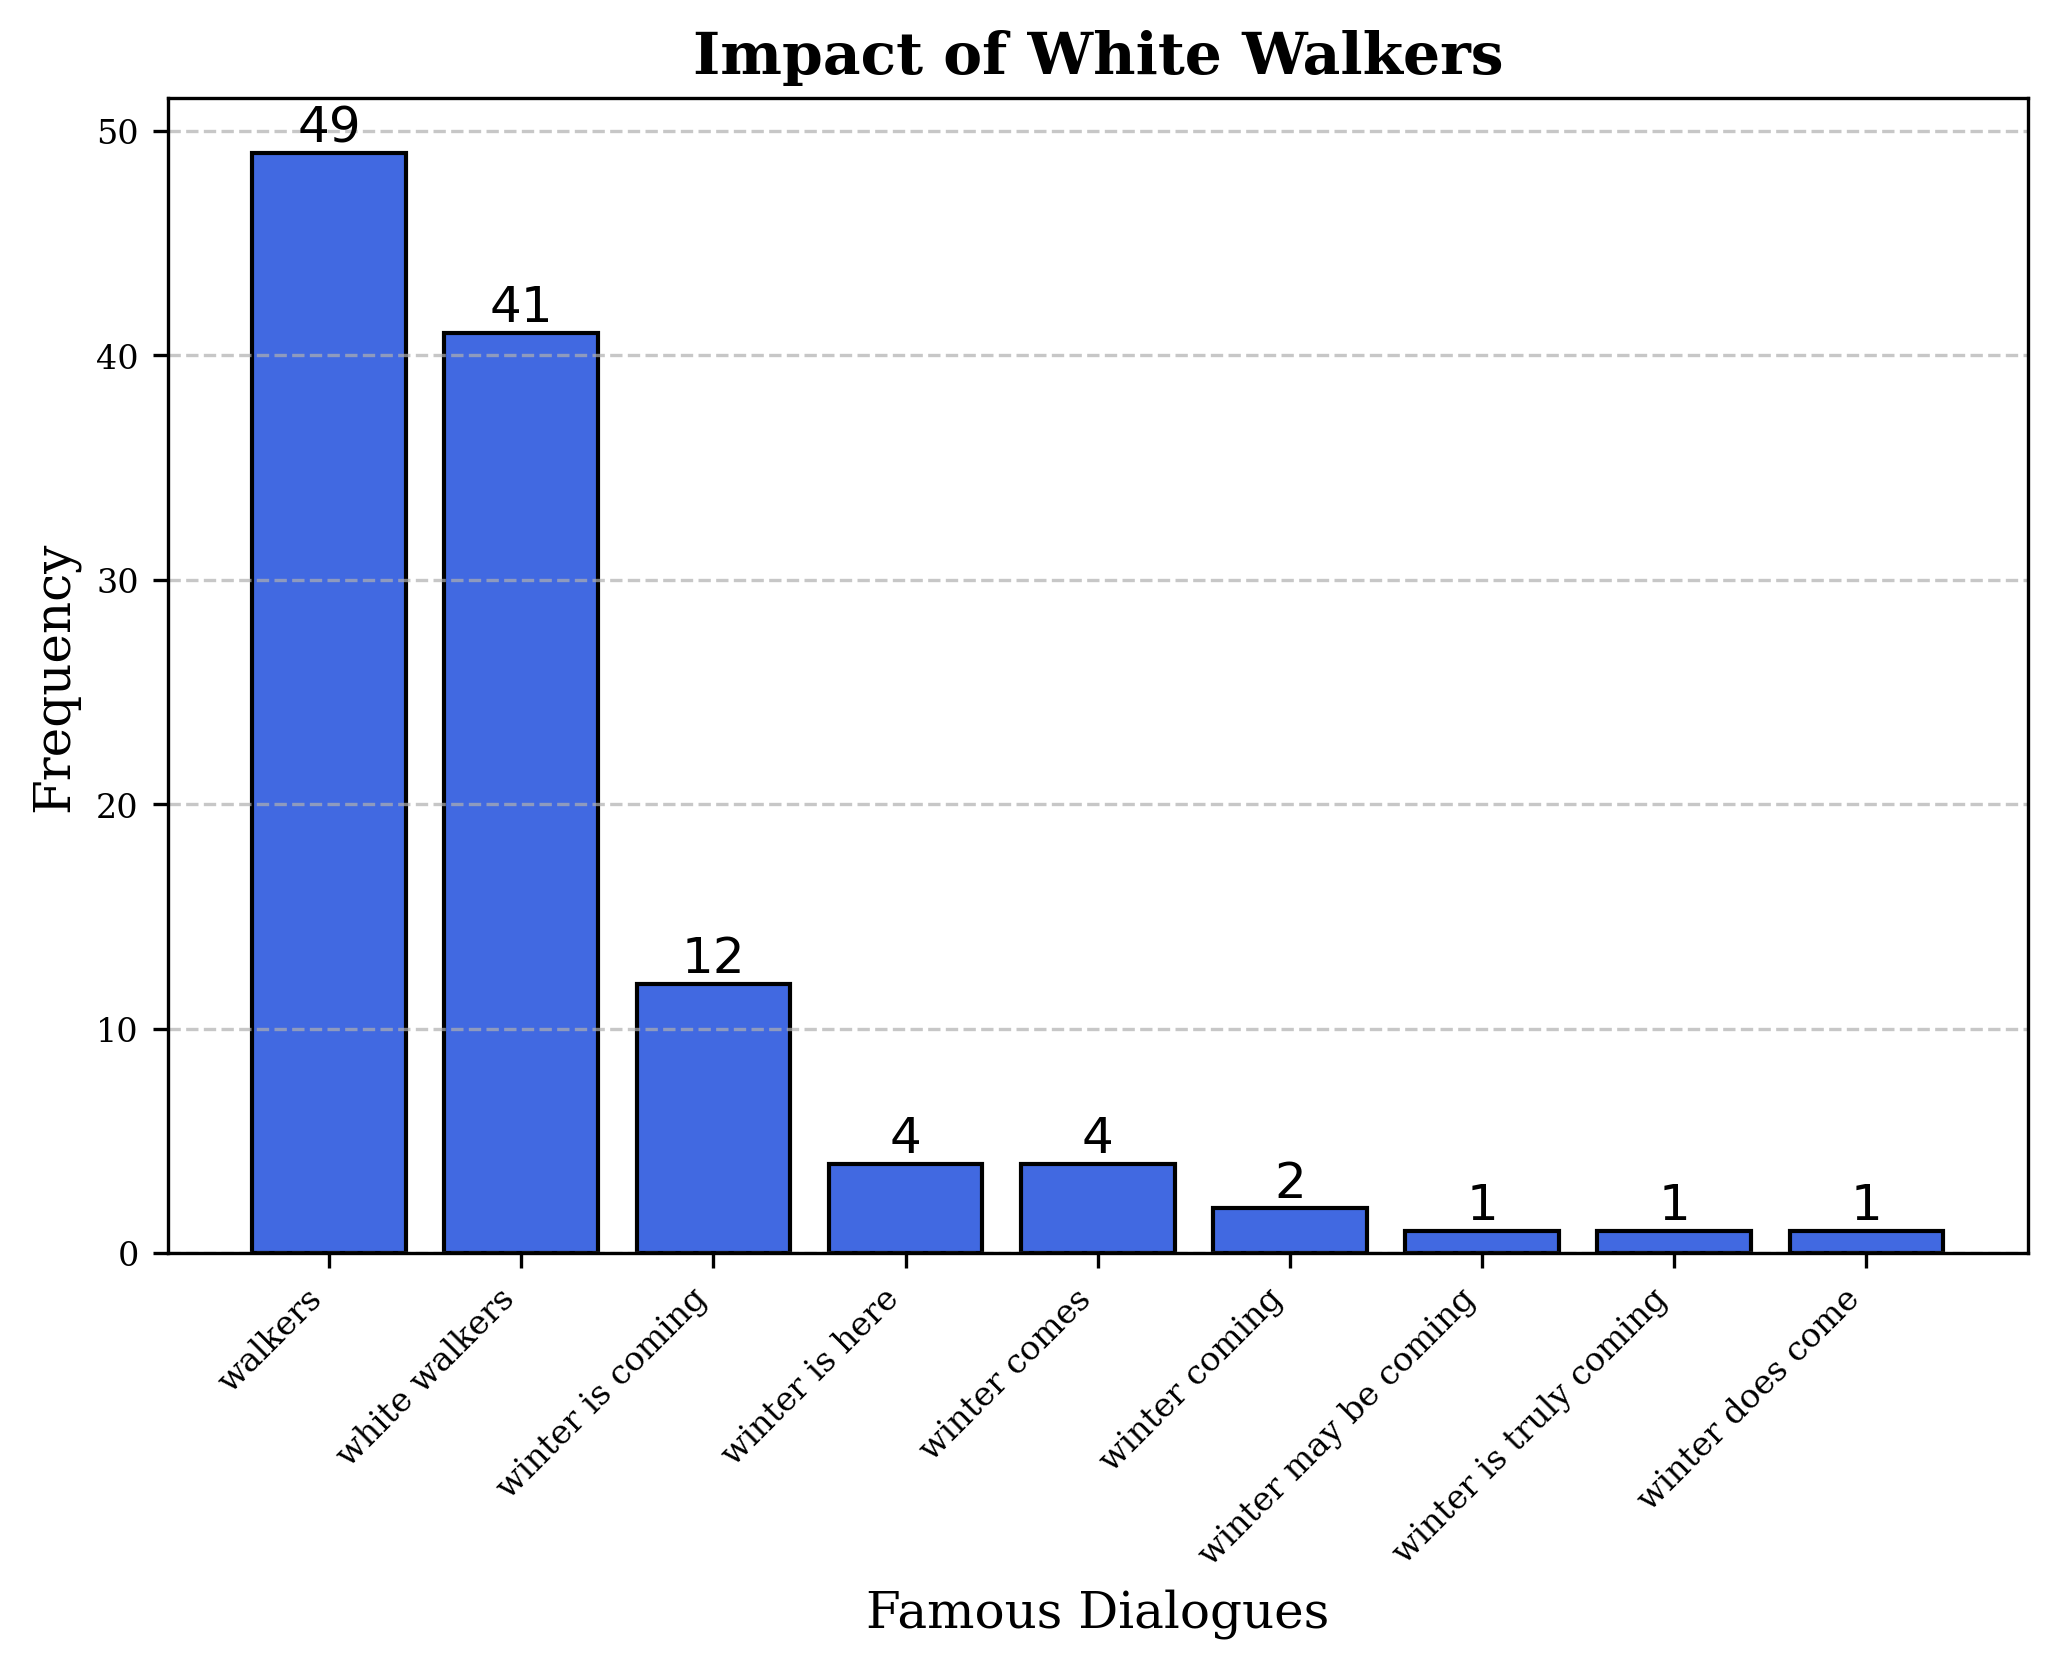

In [6]:
# Plotting the N-grams and its frequency using Histogram
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
bars = ax.bar(sorted_data.keys(), sorted_data.values(), color='royalblue', edgecolor='black')

plt.xticks(rotation=45, ha='right',fontsize=8,family='serif')
plt.yticks(fontsize=8,family='serif')
plt.xlabel('Famous Dialogues', fontsize=12,family='serif')
plt.ylabel('Frequency', fontsize=12,family='serif')
plt.title('Impact of White Walkers', fontsize=14,fontweight='bold',family='serif')
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            str(bar.get_height()), ha='center', fontsize=12)
plt.show()

From the above bar plot , it is evident that even though the **White Walkers** are not present during the entire season 1 of Game of Thrones web series , the fear of the Antagonist character **"Deadly White walkers"** is felt by all the other main characters in the dialogues spoken among which **"Winter is Coming!"** is the famous dialogue.

**SENTIMENT ANALYSIS USING VADER:**

Lets load the prepared **Game of Thrones season1 data** into Pandas Dataframe with the below column data.
    
    -   Speaker
    -   House of Speaker
    -   Listener
    -   House of Listener
    -   Interaction
    -   Interaction Type
    -   Interaction Score
    -   Result into Pandas Dataframe.

In [7]:
file_path1 = script_dir.parent / "Dataset" / "GoT_season1_data.csv"
Got_s1_data = pd.read_csv(file_path1)
Got_s1_data.head(5)

Season    Episode     Episode Title    Scene          Name       Speaker  \
0  Season 1  Episode 1  Winter is Coming  Scene 1  waymar royce  Waymar Royce   
1  Season 1  Episode 1  Winter is Coming  Scene 1          will          Will   
2  Season 1  Episode 1  Winter is Coming  Scene 1  waymar royce  Waymar Royce   
3  Season 1  Episode 1  Winter is Coming  Scene 1          will          Will   
4  Season 1  Episode 1  Winter is Coming  Scene 1         gared         Gared   

  House of Speaker      Listener House of Listener  \
0    Night's Watch          Will     Night's Watch   
1    Night's Watch  Waymar Royce     Night's Watch   
2    Night's Watch          Will     Night's Watch   
3    Night's Watch         Gared     Night's Watch   
4    Night's Watch         Royce     Night's Watch   

                                         Interaction Interaction type  \
0  What do you expect? They're savages. One lot s...     Conversation   
1  I've never seen wildlings do a thing like this...     Conversation   
2                             How close did you get?     Conversation   
3                            Close as any man would.     Conversation   
4                   We should head back to the wall.     Conversation   

   Interaction Score Interaction Result  
0                1.0                NaN  
1                1.0                NaN  
2                1.0                NaN  
3                1.0                NaN  
4                1.0                NaN

Lets create a new column called **Manual Sentiment**  based on the manual interaction score!

In [8]:
Got_s1_data['Manual Sentiment'] = np.where(Got_s1_data['Interaction Score'] == 1.0, 'Positive', 'Negative')
Got_s1_data.head(2)

Season    Episode     Episode Title    Scene          Name       Speaker  \
0  Season 1  Episode 1  Winter is Coming  Scene 1  waymar royce  Waymar Royce   
1  Season 1  Episode 1  Winter is Coming  Scene 1          will          Will   

  House of Speaker      Listener House of Listener  \
0    Night's Watch          Will     Night's Watch   
1    Night's Watch  Waymar Royce     Night's Watch   

                                         Interaction Interaction type  \
0  What do you expect? They're savages. One lot s...     Conversation   
1  I've never seen wildlings do a thing like this...     Conversation   

   Interaction Score Interaction Result Manual Sentiment  
0                1.0                NaN         Positive  
1                1.0                NaN         Positive

Let split the **Speaker, Listener, Interaction, Manual Sentiment** column into a new dataframe!

In [9]:
s1_upd_text_data = Got_s1_data[['Speaker','Listener','Interaction','Manual Sentiment']]
s1_upd_text_data.head(5)

Speaker      Listener  \
0  Waymar Royce          Will   
1          Will  Waymar Royce   
2  Waymar Royce          Will   
3          Will         Gared   
4         Gared         Royce   

                                         Interaction Manual Sentiment  
0  What do you expect? They're savages. One lot s...         Positive  
1  I've never seen wildlings do a thing like this...         Positive  
2                             How close did you get?         Positive  
3                            Close as any man would.         Positive  
4                   We should head back to the wall.         Positive

Creating new corpus from the pandas dataframe **"s1_upd_text_data"!** Lets continue with the **Character Sentiment Analysis** using **VADER** . The data used is the **Interaction column** from the dataset which represents the dialogue spoken by each character in season1.

In [10]:
# Creating new corpus in the s1_upd_text_data

new_corpus = []
for index, row in s1_upd_text_data.iterrows():
    sentence = str(row.Interaction).lower().strip()
    new_corpus.append(sentence)

In [11]:
# Downloading the vader Lexicon 
nltk.download('vader_lexicon')

# Initializing the SentimentIntensityAnalyzer()
analyzer = SentimentIntensityAnalyzer()

# Create a copy of dataframe s1_upd_text_data
text_data = s1_upd_text_data.copy()

# Calculate the sentiment polarity scores and compound score for each interaction 
text_data['Sentiment scores'] = text_data['Interaction'].apply(lambda x: analyzer.polarity_scores(str(x)))
text_data['Compound Score'] = text_data['Sentiment scores'].apply(lambda x: x['compound'])

# Catogorize each Sentiment
text_data['VADER Sentiment'] = text_data['Compound Score'].apply(lambda x: "Positive" if x > 0.05 else "Negative" if x < -0.05 else "Neutral")

#Print the dataframe
text_data[['Speaker','Listener','Interaction','Manual Sentiment', 'Compound Score', 'VADER Sentiment']].head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Speaker      Listener  \
0  Waymar Royce          Will   
1          Will  Waymar Royce   
2  Waymar Royce          Will   
3          Will         Gared   
4         Gared         Royce   

                                         Interaction Manual Sentiment  \
0  What do you expect? They're savages. One lot s...         Positive   
1  I've never seen wildlings do a thing like this...         Positive   
2                             How close did you get?         Positive   
3                            Close as any man would.         Positive   
4                   We should head back to the wall.         Positive   

   Compound Score VADER Sentiment  
0         -0.7717        Negative  
1          0.6124        Positive  
2          0.0000         Neutral  
3          0.0000         Neutral  
4          0.0000         Neutral

Now, Lets compare the differences between **manual Interaction tone** and the **sentiment of the interaction(context)** by VADER using **confusion matrix**!

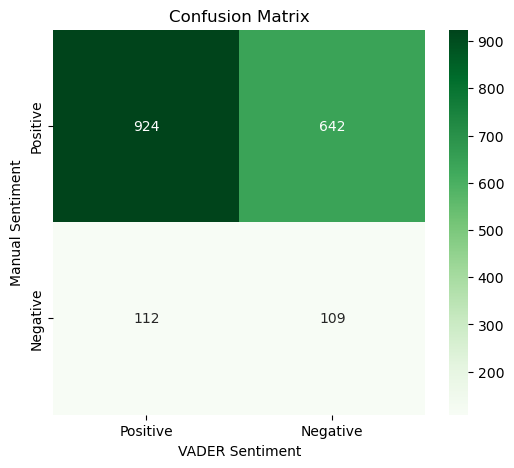

In [12]:
labels = ['Positive', 'Negative']
cm = confusion_matrix(text_data['Manual Sentiment'], text_data['VADER Sentiment'], labels=['Positive', 'Negative'])
# Lets Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('VADER Sentiment')
plt.ylabel('Manual Sentiment')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Print classification report (includes Precision, Recall, and F1 score)
report = classification_report(text_data['Manual Sentiment'], text_data['VADER Sentiment'], labels=labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Positive       0.89      0.33      0.48      2801
    Negative       0.15      0.29      0.19       379

   micro avg       0.58      0.32      0.42      3180
   macro avg       0.52      0.31      0.34      3180
weighted avg       0.80      0.32      0.45      3180



From the above classification report, it is confirmed that the VADER sentiment analysis is not performing well for the **Negative** sentiments. 

The reason for this low performance is the VADER Sentiment analyser analyzes the sentences or interactions based on the words that depict **negative emotions** rather than considering the **real context** of the sentence or interaction. For example -

In [14]:
# Lets filter the Negative Sentiments from VADER sentiment column
data_for_analysis = text_data[text_data["VADER Sentiment"]=='Negative']
data_for_analysis[["Speaker","Interaction","Manual Sentiment","VADER Sentiment"]].head(10)

Speaker                                        Interaction  \
0   Waymar Royce  What do you expect? They're savages. One lot s...   
5          Royce                          Do the dead frighten you?   
7          Royce  You don't think he'll ask us how they died? Ge...   
8           Will  Whatever did it to them could do it to us. The...   
10         Royce             Your dead men seem to have moved camp.   
36  Eddard Stark  nods yes, and WILL is positioned on the tree l...   
42  Eddard Stark  Lord of the Seven Kingdoms and protector of th...   
46  Eddard Stark       But do you understand why I had to kill him?   
51    Bran Stark                                   So he was lying?   
55  Eddard Stark        There are no mountain lions in these woods.   

   Manual Sentiment VADER Sentiment  
0          Positive        Negative  
5          Positive        Negative  
7          Positive        Negative  
8          Positive        Negative  
10         Positive        Negative  
36         Positive        Negative  
42         Negative        Negative  
46         Positive        Negative  
51         Positive        Negative  
55         Positive        Negative

From the above data analysis, in the **real context** , interactions like **"Do the dead frighten you?"** is **Normal Conversation & Positive** while in **VADER Sentiment Analysis**, the same interaction is tagged as **Negative** due to the presence of words **dead, frighten**.

In order to find the **Net Sentiment Analysis of Characters**, I will using the **Manual Sentiment** data rather than **VADER Sentiment** since the **negative sentiments** are critical sentiments to understand the **power dynamics** of the **Game of thrones** characters. 

Lets first filter the data with **main characters** of Game of Thrones Season 1 by eliminating the supporting characters so that we can understand their power struggle !

In [15]:
# List of main characters from Game of Thrones Season1
main_character_list = ['Jon Snow','Sansa Stark','Eddard Stark','Robb Stark',
                       'Catelyn Stark','Jaime Lannister',
                      'Cersei Lannister','Robert Baratheon',
                      'Tyrion Lannister','Viserys Targaryen','Daenerys Targaryen',
                     'Joffrey Lannister','Varys',
                      'Renly Baratheon','Petyr Baelish','Tywin Lannister'
                      ]

# Filter the data with the main characters
filtered_df = text_data[text_data["Speaker"].isin(main_character_list)]
filtered_df.head(5)


Speaker       Listener  \
15      Jon Snow       Jon Snow   
16      Jon Snow  Septa Mordane   
18   Sansa Stark  Septa Mordane   
20  Eddard Stark       Jon Snow   
21      Jon Snow     Robb Stark   

                                          Interaction Manual Sentiment  \
15                          Go on. Father's watching.         Positive   
16                                   And your mother.         Positive   
18                                         Thank you.         Positive   
20  And which one of you was a marksman at ten? Ke...         Positive   
21                        Don't think too much, Bran.         Positive   

                                     Sentiment scores  Compound Score  \
15  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
16  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
18  {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...          0.3612   
20  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   
21  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...          0.0000   

   VADER Sentiment  
15         Neutral  
16         Neutral  
18        Positive  
20         Neutral  
21         Neutral

In [16]:
# Grouping the Sentiments with positive and negative sentiments
positive_count = filtered_df[filtered_df['Manual Sentiment'] == 'Positive'].groupby('Speaker').size()
negative_count = filtered_df[filtered_df['Manual Sentiment'] == 'Negative'].groupby('Speaker').size()

# Convert series to DataFrame and rename columns
positive_count = positive_count.to_frame(name='Positive_Count')
negative_count = negative_count.to_frame(name='Negative_Count')

# Merge both counts into a single DataFrame
sentiment_df = pd.merge(positive_count, negative_count, on='Speaker', how='outer').fillna(0)

# Calculate Net Sentiment
sentiment_df['Net_Sentiment'] = sentiment_df['Positive_Count'] - sentiment_df['Negative_Count']

# Sorting the values from the Net Sentiment
sentiment_df = sentiment_df.astype(int)
sentiment_df.sort_values(by="Net_Sentiment",ascending=False,inplace=True)

sentiment_df = sentiment_df.reset_index(drop=False)
sentiment_df['Speaker'] = sentiment_df['Speaker'].str.title()


In [17]:
# Printing the Sentiment Dataframe with the Net Sentiment Score for each character
sentiment_df

Speaker  Positive_Count  Negative_Count  Net_Sentiment
0         Eddard Stark             304              33            271
1     Tyrion Lannister             191              21            170
2             Jon Snow             136               1            135
3        Catelyn Stark             119              19            100
4     Robert Baratheon             108              10             98
5        Petyr Baelish             104               8             96
6   Daenerys Targaryen             110              17             93
7                Varys              79               1             78
8           Robb Stark              71               8             63
9          Sansa Stark              76              23             53
10     Renly Baratheon              44               0             44
11   Viserys Targaryen              56              14             42
12    Cersei Lannister              76              41             35
13     Jaime Lannister              55              29             26
14     Tywin Lannister              23              12             11
15   Joffrey Lannister              30              28              2

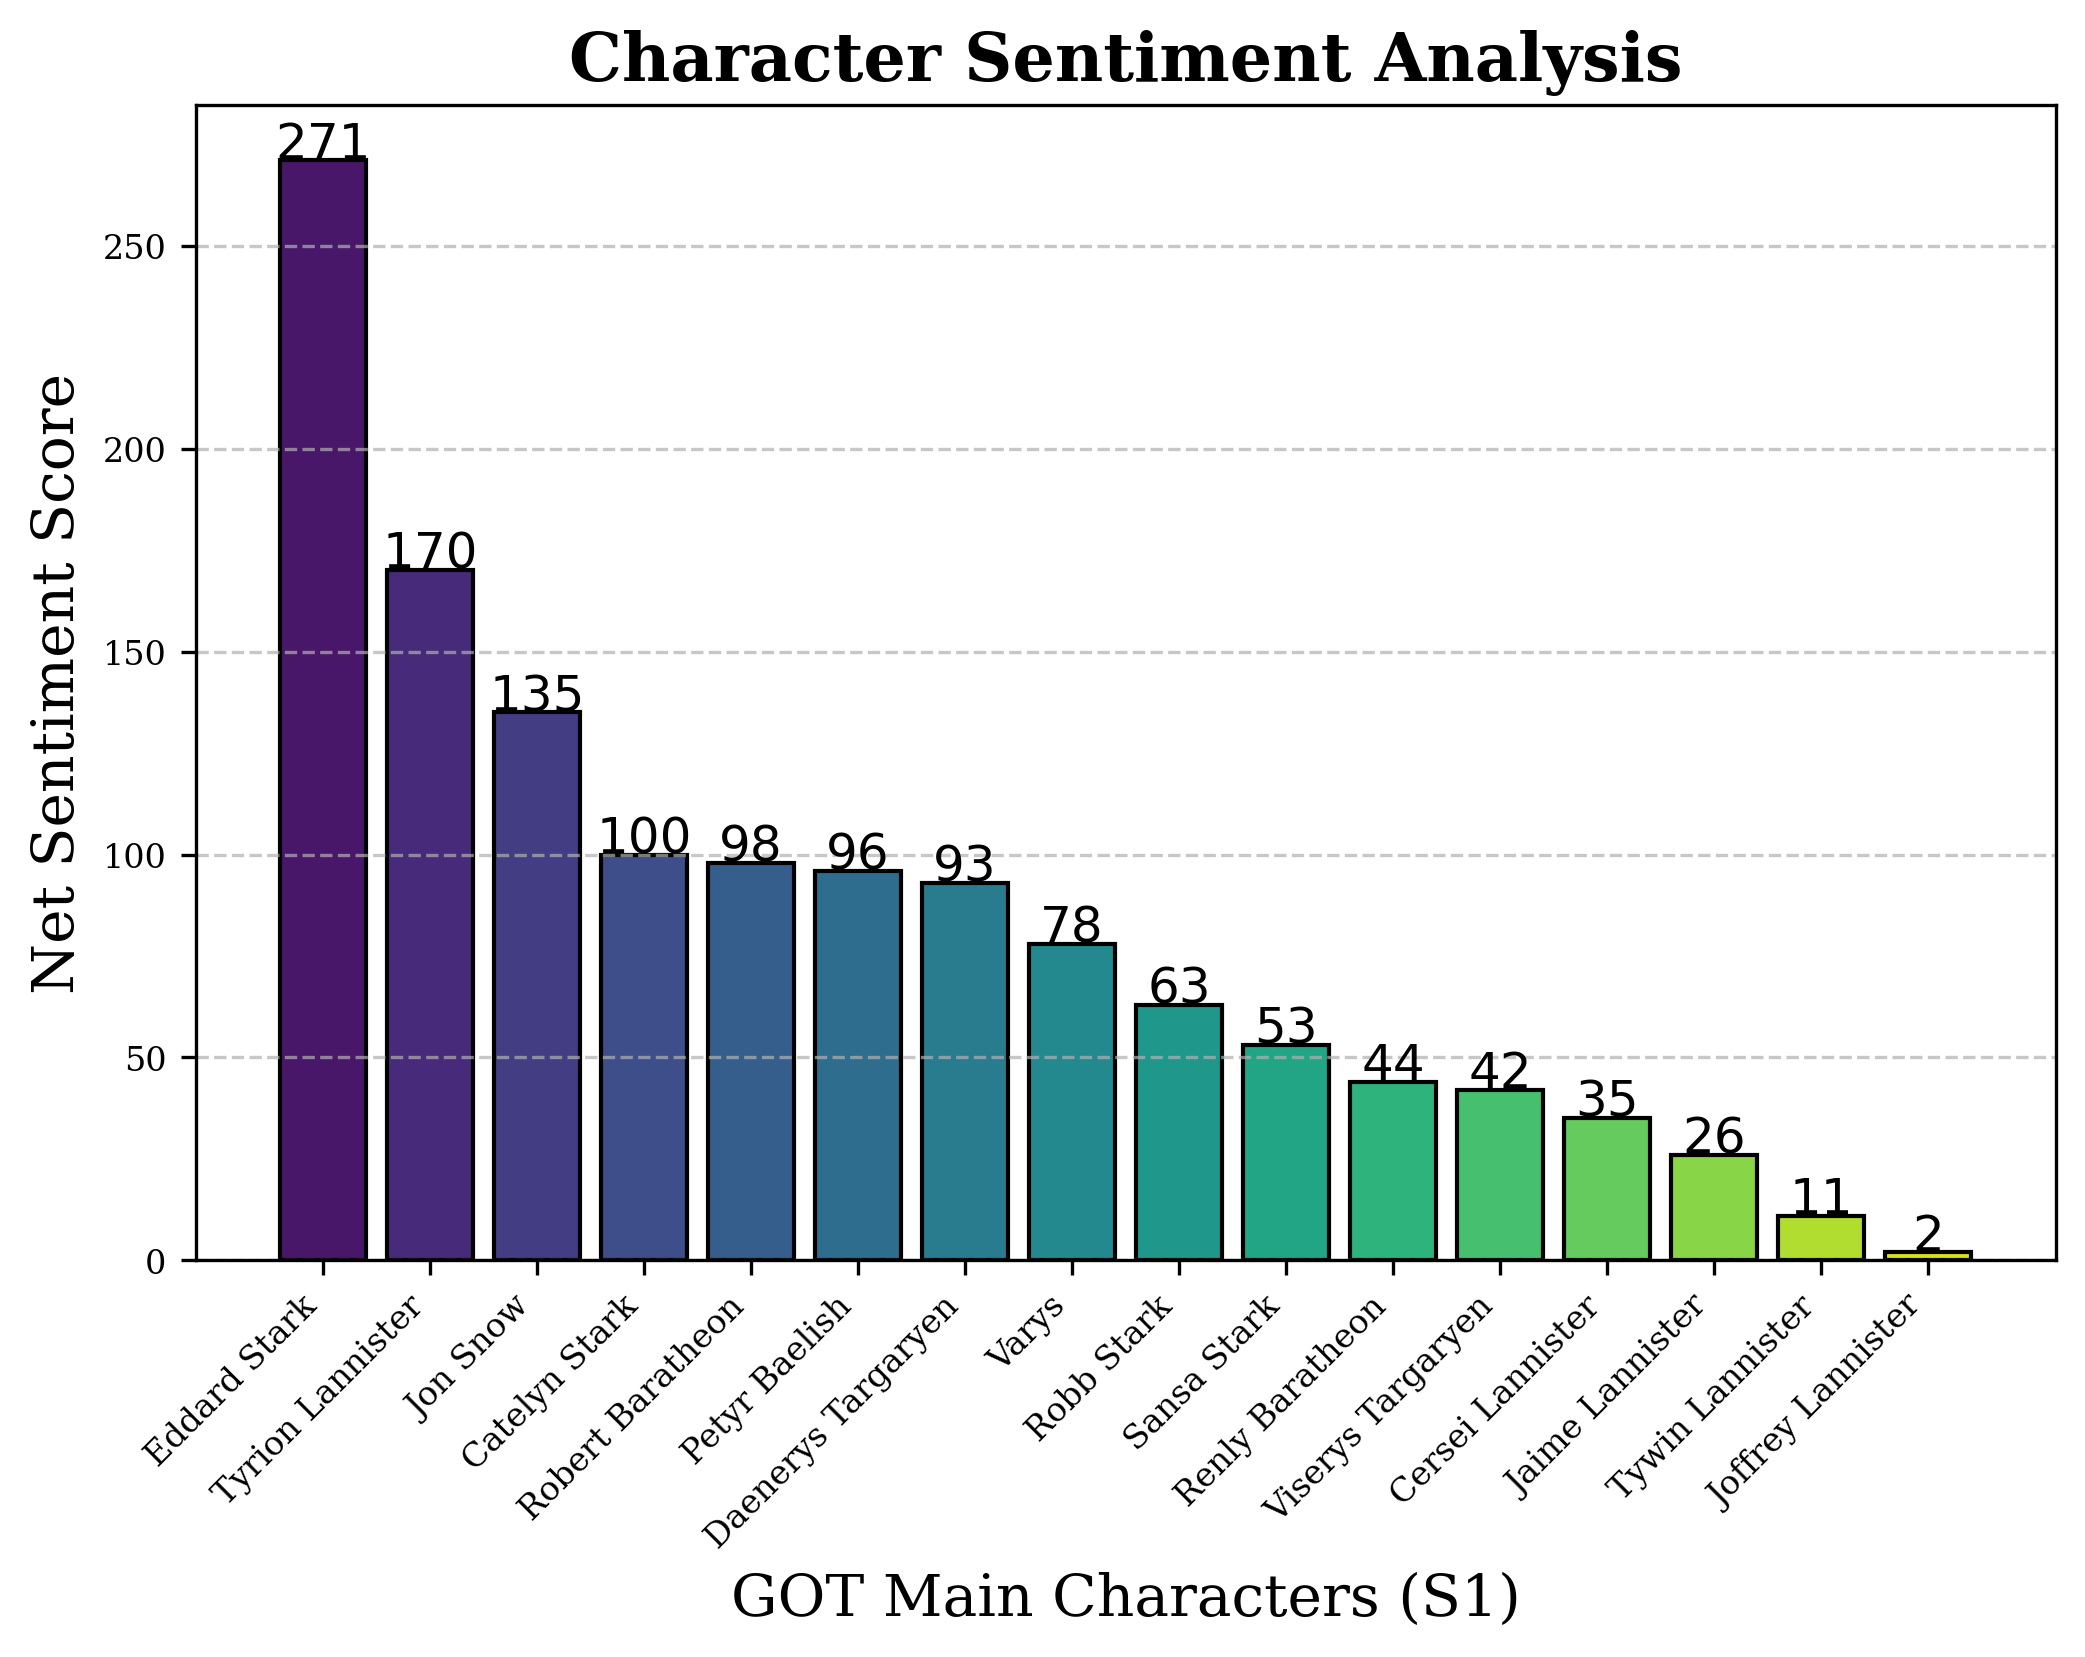

In [18]:
# Plotting the net sentiment using Histogram

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
colors = sns.color_palette("viridis", len(sentiment_df))
bars = ax.bar(sentiment_df['Speaker'], sentiment_df['Net_Sentiment'], color=colors, edgecolor='black')

plt.xticks(rotation=45, ha='right',fontsize=8, family='serif')
plt.yticks(fontsize=8, family='serif')

plt.xlabel('GOT Main Characters (S1)', fontsize=14, family='serif')
plt.ylabel('Net Sentiment Score', fontsize=14, family='serif')
plt.title('Character Sentiment Analysis', fontsize=16,fontweight='bold', family='serif')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            str(bar.get_height()), ha='center', fontsize=12)
plt.show()


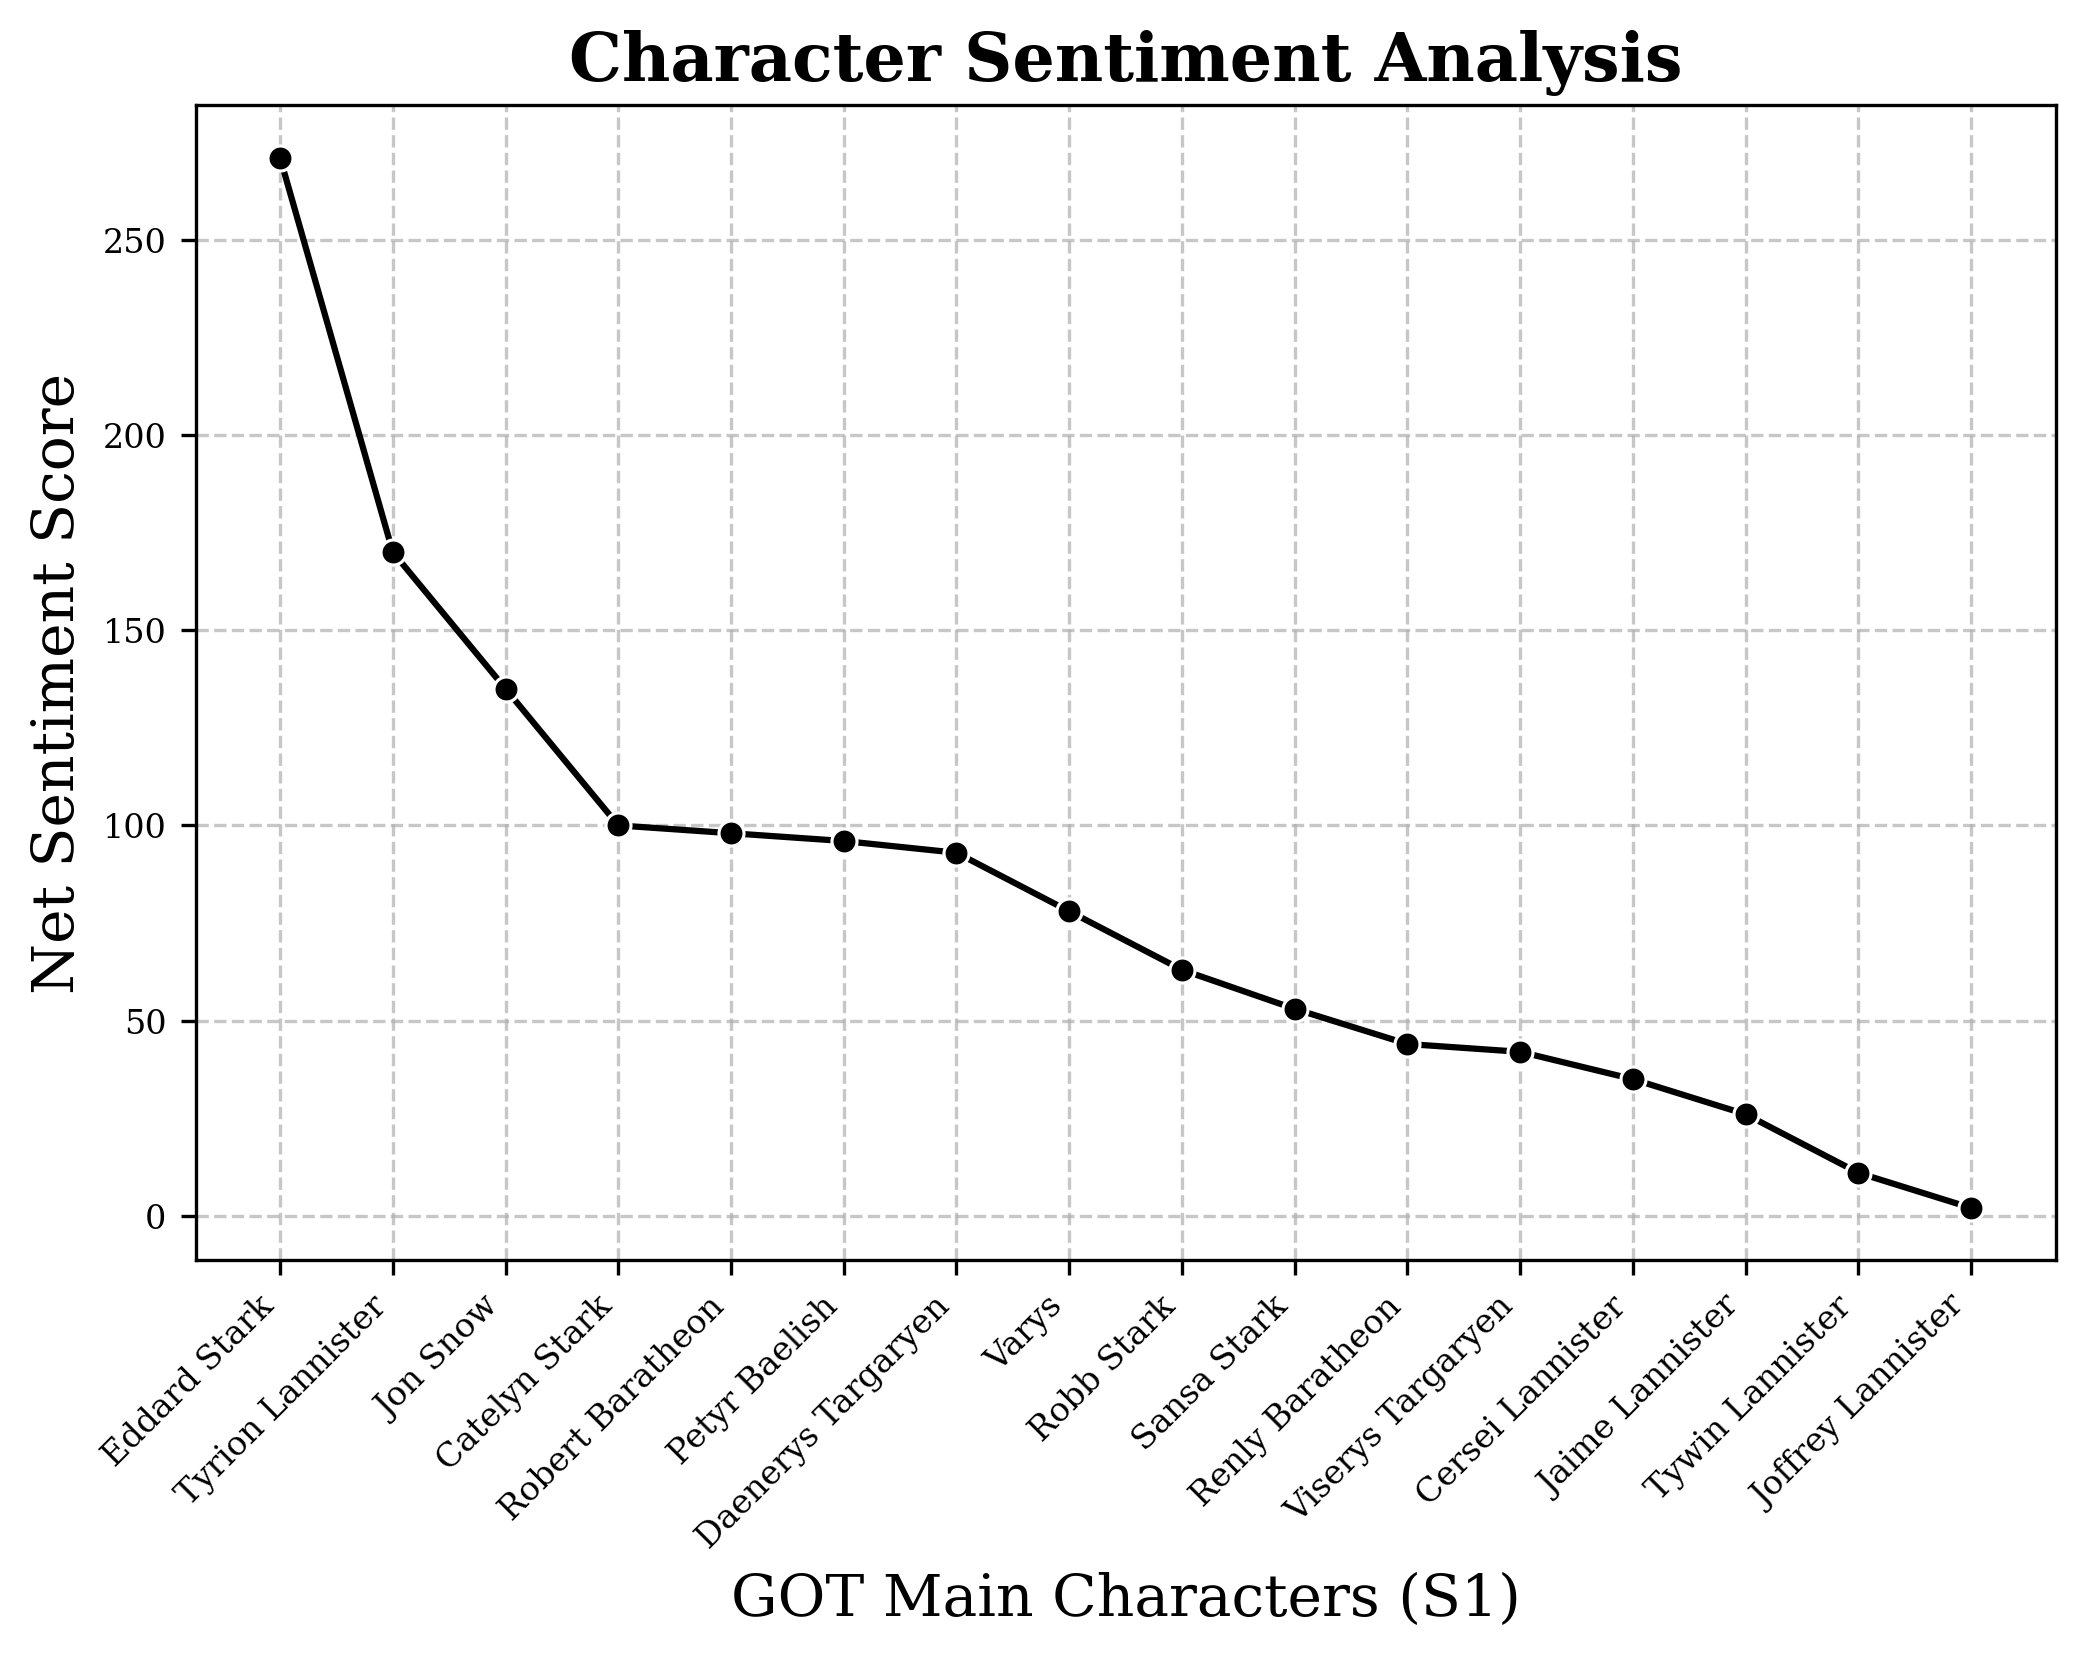

In [19]:
# Creating a line plot for the Net Sentiment Score for each character
plt.figure(figsize=(8, 5), dpi=300)
sns.lineplot(x=sentiment_df['Speaker'], y=sentiment_df['Net_Sentiment'], marker='o',color='black')

plt.xticks(rotation=45, ha='right', family='serif', fontsize=8)
plt.yticks(family='serif', fontsize=8)
plt.xlabel('GOT Main Characters (S1)', fontsize=14, family='serif')
plt.ylabel('Net Sentiment Score', fontsize=14, family='serif')
plt.title('Character Sentiment Analysis', fontsize=16, fontweight='bold', family='serif')

plt.grid(linestyle='--', alpha=0.7)
#plt.tight_layout()
plt.show()

**Interpreting the Net Sentiment Analysis of GoT Characters:**



The **Net Sentiment Score** (Positive - Negative) helps us understand each character's **overall tone** in their dialogues. Higher scores indicate **more positive sentiment**, while lower scores suggest **more negative sentiment**.


**Heroic and Well-Liked Characters:**
- **Eddard Stark, Tyrion Lannister, and Jon Snow** consistently have very high positive net sentiment.
- These characters are seen as **heroic, moral, or sympathetic**, leading to widespread fan support.
- Tyrion in particular is loved for his intelligence, wit, and resilience, while Jon Snow embodies the “reluctant hero” archetype, which resonates with many viewers.
- Eddard Stark is viewed as a **symbol of honor and integrity**, leading to strong positive sentiment as a leader.

**Characters with most Negative Sentiment:**
- **Cersei Lannister, Jaime Lannister, and Joffrey Lannister** are examples of characters with more mixed or negative sentiment.
- Cersei and Jaime have nuanced arcs: they are both disliked for their morally questionable actions (especially early in the series), but over time, viewers witness their growth, making them more complex characters. 
- Cersei's ambition and ruthlessness lead to a lower net sentiment, while Jaime’s redemption arc improves his perception.
- Joffrey is almost universally hated for his **cruelty and sadistic** behavior, due to his portrayal as a major antagonist **killing Eddard Stark**.

---

**TOPIC MODELLING USING Non-Negative Matrix Factorization (NNMF):**

Before performing the topic modelling using Non-Negative Matrix Factorization, we need to preprocess text/dialogue by 

    -   removing digits
    -   removing stopwords in "English" Language
    -   stripping the extra space
    -   creating lemma for word tokens

In [20]:
# Lets initialize the stop words
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    # Removing digits
    text = re.sub(r'\d+','', text) 

    #translator = str.maketrans('','',string.punctuation)
    #text = text.translate(translator) # remove punctuation

    text = text.strip()
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if w not in stop_words and w.isalpha()]

    # Initialize the WordNetlemmatizer to create Lemma for the word tokens
    lemmatized = []
    lemmatizer = WordNetLemmatizer()
    for word in filtered_tokens:
        lemmatized.append(lemmatizer.lemmatize(word))
    return list(set(lemmatized))

preprocessed_docs = [preprocess_text(doc) for doc in new_corpus]


In [21]:
# list the custom stop words
custom_stop_words = ['didnt', 'doesnt', 'youll', 'im', 'dont', 'isnt', 'arent', 'wasnt', 'werent','youve',
                     'there','yes','might','said','name','perhaps','shouldnt']

# Create a document-term matrix
vectorizer = CountVectorizer(min_df=10,stop_words=custom_stop_words )
X = vectorizer.fit_transform([" ".join(doc) for doc in preprocessed_docs])

# Get the terms (words)
terms = vectorizer.get_feature_names_out()

In [22]:
# Initialize the number of topics as 50
num_topics = 50
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

In [23]:
# number of top words - 10
num_top_words = 10

# print all the topics with the top 10 words
for topic_idx, topic in enumerate(H):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [terms[i] for i in top_words_idx]
    print(f"T{topic_idx} :", ", ".join(top_words))

T0 : girl, seven, kingdom, targaryen, two, much, die, believe, woman, dothraki
T1 : lord, snow, eddard, house, realm, mean, high, commander, forgive, call
T2 : king, landing, robert, mad, serve, true, god, justice, throne, raven
T3 : know, word, fool, dead, remember, child, fight, put, lt, much
T4 : want, give, ca, world, leave, hear, wo, something, ever, queen
T5 : one, last, day, queen, already, two, told, love, seven, got
T6 : like, hair, wine, ever, mean, sun, nothing, came, lannisters, away
T7 : would, child, nothing, killed, mother, wrong, fool, lf, friend, everyone
T8 : father, told, please, left, killed, head, ever, war, mad, many
T9 : stark, ned, winterfell, eddard, head, word, bastard, called, world, sorry
T10 : boy, already, bit, lost, young, lannisters, call, without, beyond, first
T11 : man, kingdom, seven, true, land, return, gold, fine, crime, oh
T12 : go, home, back, war, joffrey, stay, queen, wo, bring, head
T13 : time, first, last, next, long, saw, quite, told, hundre

From the above **50 topics** created, lets label each topic and filter out the top keywords! 

    -   Daenarys : T0, T11, T23, T34, T45
    -   Stark : T1, T9, T37, T38, T39 , T48
    -   Mad king : T2
    -   Fight : T3, T15, T27
    -   Lannister : T6, T12, T22, T24,  T47, T49
    -   Night Watch : T14
    -   Death : T7, T8, T18, T25
    -   Honor : T26
    -   Dothraki : T31, T33
    -   White walker :T46

| Topic | Keywords | Topic Name |
|-----------|---------------|---------------|
| T0 | girl,  targaryen, woman, dothraki | Daenarys |
| T11 | kingdom, seven, return, gold | Daenarys |
| T23 | mother, dothraki, wife, woman | Daenarys |
| T34 | sister, dragon, khaleesi, queen | Daenarys |
| T45 | khaleesi, wrong, save, honor | Daenarys |
| T1 | snow, eddard,realm, commander | Stark |
| T9 | stark, winterfell, eddard, bastard | Stark |
| T37 | grace, command, winterfell, matter | Stark |
| T38 | woman, love, honor, treason | Stark |
| T39 | wife, eddard, great, love | Stark |
| T2 | king,  robert, mad, throne | Mad king |
| T48 | arryn, death, died, robert | Mad king |
| T3 | fool, dead, fight, child | Fight |
| T15 | throne, winter, war, fight | Fight |
| T27 | men, army, khal, knight | Fight |
| T44 | life, death, blood, dead | Fight |
| T6 | hair, wine, sun, lannisters | Lannister |
| T12 | war, joffrey, queen, bring, head | Lannister |
| T24 | seven, kingdom, sister, justice  | Lannister |
| T47 | tywin, lannisters, pay, gold | Lannister |
| T49 | sword, day, joffrey, bastard | Lannister |
| T14 | night, watch, castle, commander | Night Watch |
| T7 | killed, mother, wrong, fool | Death |
| T8 | father, killed, war, mad | Death |
| T18 | kingdom, child, god, death | Death |
| T25 | mother, die, north, matter | Death |
| T26 | knight, jaime, squire, honor | Honor |
| T31 | happy, khal, love, drogo | Dothraki |
| T33 | khal, drogo, blood, whore | Dothraki |
| T46 | wall, north, walker, wildlings | White walker |


---

### **Network Analysis:**

In the network analysis , each **character** will be considered as **Nodes** and the **Interaction** between the characters will be considered as **Edges**

Lets use the the same season1 Game of Thrones prepared data **Got_s1_data** dataframe for Network analysis.

In [24]:
Got_s1_data.head(5)

Season    Episode     Episode Title    Scene          Name       Speaker  \
0  Season 1  Episode 1  Winter is Coming  Scene 1  waymar royce  Waymar Royce   
1  Season 1  Episode 1  Winter is Coming  Scene 1          will          Will   
2  Season 1  Episode 1  Winter is Coming  Scene 1  waymar royce  Waymar Royce   
3  Season 1  Episode 1  Winter is Coming  Scene 1          will          Will   
4  Season 1  Episode 1  Winter is Coming  Scene 1         gared         Gared   

  House of Speaker      Listener House of Listener  \
0    Night's Watch          Will     Night's Watch   
1    Night's Watch  Waymar Royce     Night's Watch   
2    Night's Watch          Will     Night's Watch   
3    Night's Watch         Gared     Night's Watch   
4    Night's Watch         Royce     Night's Watch   

                                         Interaction Interaction type  \
0  What do you expect? They're savages. One lot s...     Conversation   
1  I've never seen wildlings do a thing like this...     Conversation   
2                             How close did you get?     Conversation   
3                            Close as any man would.     Conversation   
4                   We should head back to the wall.     Conversation   

   Interaction Score Interaction Result Manual Sentiment  
0                1.0                NaN         Positive  
1                1.0                NaN         Positive  
2                1.0                NaN         Positive  
3                1.0                NaN         Positive  
4                1.0                NaN         Positive

Let's rename the columns so that it is useful for network analysis and visualization using Gephi.

In [25]:
upd_s1_data = Got_s1_data.copy()
upd_s1_data.rename(columns={'Speaker':'Source','Listener':'Target',
                            'House of Speaker':'Source House',
                            'House of Listener':'Listener House'
                            }, inplace=True)
upd_s1_data.head(1)

Season    Episode     Episode Title    Scene          Name        Source  \
0  Season 1  Episode 1  Winter is Coming  Scene 1  waymar royce  Waymar Royce   

    Source House Target Listener House  \
0  Night's Watch   Will  Night's Watch   

                                         Interaction Interaction type  \
0  What do you expect? They're savages. One lot s...     Conversation   

   Interaction Score Interaction Result Manual Sentiment  
0                1.0                NaN         Positive

Now the revised dataframe contains the following details 

    -   **Source** : Character who speaks the dialogue
    -   **Target** : Character who listens to the dialogue
    -   **Interaction** : Dialogue of action by the character
    -   **Interaction Type** : Normal/Friendly/Conflict
    -   **Interaction Score** : 1 (Normal/Friendly/Ally) / -1 (Conflict, Fight, Battle)
    -   **Interaction Result** : Win/Loss (In case of conflict)

Firstly, Lets find out the relationship type between the main characters in the Game of Thrones Season 1 whether it is a **postive** (friendly) or **negative** (conflict) .

In [26]:
# Filtering the main characters from the dataset
filtered_df = upd_s1_data[(upd_s1_data["Source"].isin(main_character_list)) &
                            (upd_s1_data["Target"].isin(main_character_list))]
filtered_df.shape

(1102, 14)

In [27]:
# Saving the filtered Df as csv to view the data in Gephi
filtered_df.reset_index(inplace=True)
file_path2 = script_dir.parent / "Dataset" / "Signed_network_edge_data.csv"
filtered_df.to_csv(file_path2)

In [28]:
# Lets create a network graph with the main characters as nodes and interactions as edges 
# Signed Network Graph to understand the relationship between characters
graph1 = nx.Graph()

main_character_list = ['Jon Snow','Sansa Stark','Eddard Stark','Robb Stark',
                       'Catelyn Stark','Jaime Lannister',
                      'Cersei Lannister','Robert Baratheon',
                      'Tyrion Lannister','Viserys Targaryen','Daenerys Targaryen',
                     'Joffrey Lannister','Varys',
                      'Renly Baratheon','Petyr Baelish','Tywin Lannister'
                      ]
# Adding main characters as nodes
for node in main_character_list:
    graph1.add_node(node)

# Adding interactions as edges
for src, tgt, wt in zip(filtered_df['Source'], filtered_df['Target'], filtered_df['Interaction Score']):
    graph1.add_edge(src,tgt, weight=wt)

# Remove self loops if any
graph1.remove_edges_from(nx.selfloop_edges(graph1))

Now, the **network graph** is created . We are going to draw the signed network graph showing the positive and negative interaction between main characters of GoT Season1.

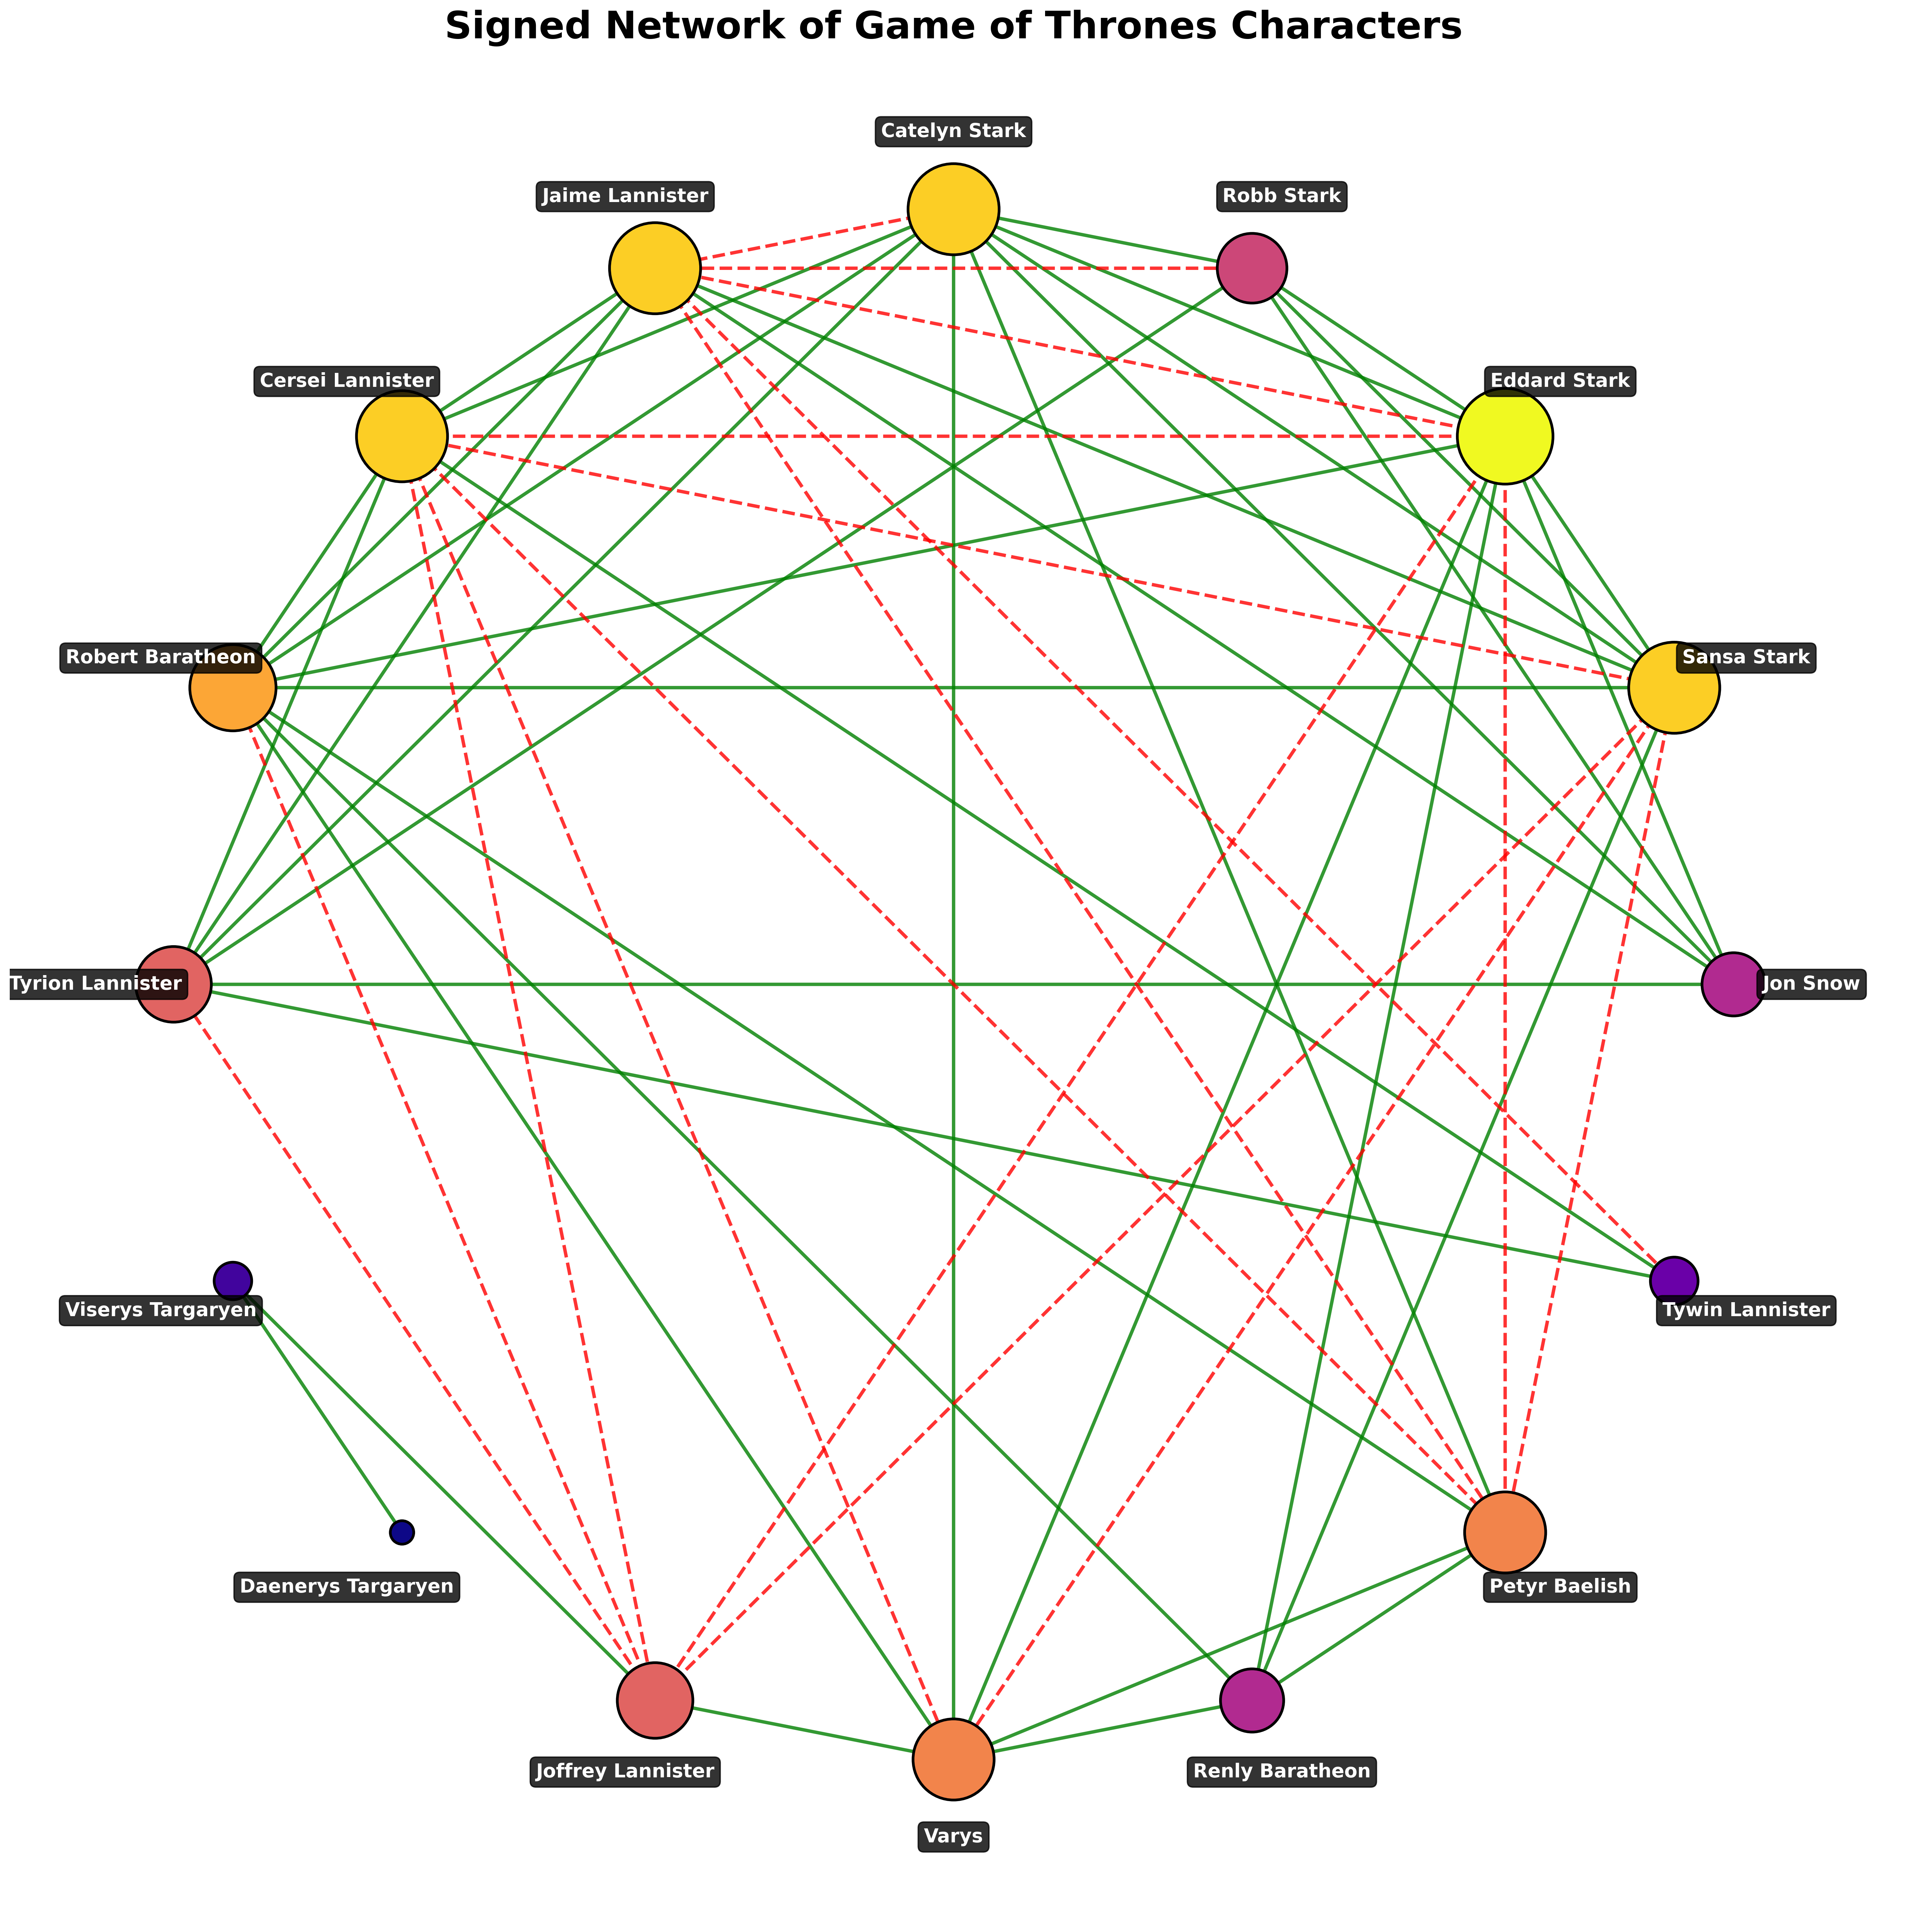

In [29]:
# Set figure size and high DPI for clarity
plt.figure(figsize=(25, 25), dpi=300)

# Use circular layout for better visualization
pos = nx.circular_layout(graph1)

# Normalize node sizes based on degree centrality
degrees = np.array([graph1.degree(n) for n in graph1.nodes()])
min_size, max_size = 300, 5000  
node_sizes = min_size + (max_size - min_size) * (degrees - degrees.min()) / (degrees.max() - degrees.min())

# Define color map for nodes based on their degree centrality
node_colors = plt.cm.plasma((degrees - degrees.min()) / (degrees.max() - degrees.min()))

# Draw nodes with distinct edges
nx.draw_networkx_nodes(graph1, pos, node_size=node_sizes, node_color=node_colors, edgecolors="black", linewidths=2)

# Extract edges based on weight (signed relationships)
positive_edges = [(u, v) for u, v, d in graph1.edges(data=True) if d.get("weight", 0) == 1]
negative_edges = [(u, v) for u, v, d in graph1.edges(data=True) if d.get("weight", 0) == -1]

# Draw edges with contrasting colors and better visibility
nx.draw_networkx_edges(graph1, pos, edgelist=positive_edges, edge_color="green", width=2.5, alpha=0.8)
nx.draw_networkx_edges(graph1, pos, edgelist=negative_edges, edge_color="red", width=2.5, style="dashed", alpha=0.8)

# Adjust label positions for better readability
label_pos = {node: (x * 1.1, y * 1.1) for node, (x, y) in pos.items()} 

# Draw labels with a background box for better readability
nx.draw_networkx_labels(graph1, label_pos, font_size=14, font_color="white", font_weight="bold",
                         bbox=dict(facecolor="black", edgecolor="black", alpha=0.8, boxstyle="round,pad=0.3"))

# Add a title with enhanced font size and weight
plt.title("Signed Network of Game of Thrones Characters", fontsize=28, fontweight="bold", color="black")

# Remove axis for better aesthetics
plt.axis("off")

# Display the graph
plt.show()


From the above network graph , we can visualize the relationship between main characters using signed network graph where the edges are colored based on the friendly relationship(1) or conflict (-1)

For example : **Eddard Stark** has a **Friendly** interaction with **Robert Baratheon (Mad king)** , his wife Catelyn Stark, his children whereas **Eddard Stark** has the most **conflicts** with **Cersei Lannister , Jaime Lannister , Petyr Baelish** who killed him at the end of the Season 1 of Game of Thrones

In [30]:
# Compute Centrality Measures
degree_centrality = nx.degree_centrality(graph1)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_nodes = sorted_degree_centrality[:5]
print(f"Top 5 Nodes by Degree Centrality:")
print(f"-------------------------------")
for node, centrality in top_5_nodes:
    print(f"{node}  : {centrality:.4f} ")

Top 5 Nodes by Degree Centrality:
-------------------------------
Eddard Stark  : 0.7333 
Sansa Stark  : 0.6667 
Catelyn Stark  : 0.6667 
Jaime Lannister  : 0.6667 
Cersei Lannister  : 0.6667 


Based on the above **Degree Centrality Metrics**, it is found that **Eddard Stark, Sansa Stark , Catelyn Stark, Jaime Lannister, Cersei Lannister** has the most degree ie.) interactions between characters either positive or negative

In [31]:
eg_centrality = nx.eigenvector_centrality(graph1)
sorted_eg_centrality = sorted(eg_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_nodes = sorted_eg_centrality[:5]
print("Top 5 Nodes by Eigenvector Centrality:")
print(f"-------------------------------")
for node, centrality in top_5_nodes:
    print(f"{node} : {centrality:.4f}")

Top 5 Nodes by Eigenvector Centrality:
-------------------------------
Eddard Stark : 0.3510
Sansa Stark : 0.3334
Catelyn Stark : 0.3289
Cersei Lannister : 0.3235
Robert Baratheon : 0.3120


In [32]:
close_centrality = nx.closeness_centrality(graph1)
sorted_close_centrality = sorted(close_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_nodes = sorted_close_centrality[:5]
print("Top 5 Nodes by Closeness Centrality:")
print(f"-------------------------------")
for node, centrality in top_5_nodes:
    print(f" {node} : {centrality:.4f}")

Top 5 Nodes by Closeness Centrality:
-------------------------------
 Eddard Stark : 0.7500
 Sansa Stark : 0.7143
 Cersei Lannister : 0.7143
 Robert Baratheon : 0.6818
 Catelyn Stark : 0.6522


In order to find the **power dynamics** in Game of Thrones , we need to find out the **conflicts between the characters** in the interaction and use it to understand which character or house is dominant over others in season1

In [33]:
# filtering the data with Interaction with -1 for conflicts
conflict_data = upd_s1_data[upd_s1_data["Interaction Score"]==-1.0]
conflict_data.head(2)

Season    Episode     Episode Title    Scene           Name  \
42  Season 1  Episode 1  Winter is Coming  Scene 3   eddard stark   
92  Season 1  Episode 1  Winter is Coming  Scene 5  catelyn stark   

           Source Source House        Target Listener House  \
42   Eddard Stark        Stark      Jon Snow      Targaryan   
92  Catelyn Stark        Stark  Eddard Stark          Stark   

                                          Interaction Interaction type  \
42  Lord of the Seven Kingdoms and protector of th...            Order   
92  There was a raven from Kings Landing. Jon Arry...         Conflict   

    Interaction Score Interaction Result Manual Sentiment  
42               -1.0                  W         Negative  
92               -1.0                  L         Negative

In [34]:
# Filtering the conflict data for main characters
filtered_df1 = conflict_data[(conflict_data["Source"].isin(main_character_list)) &
                            (conflict_data["Target"].isin(main_character_list))]
filtered_df1.shape

(204, 14)

In [35]:
# Copy the original dataframe
filtered_df = filtered_df1.copy()
filtered_conflict_data = filtered_df[['Source','Target']]
filtered_conflict_data = filtered_conflict_data[filtered_conflict_data['Source'] != filtered_conflict_data['Target']]

# Sorting Source and Target
filtered_conflict_data['Sorted'] = filtered_conflict_data.apply(lambda row: tuple(sorted([str(row['Source']), str(row['Target'])])), axis=1)

# Split the Sorted into two separate columns
filtered_conflict_data[['Sorted_Source', 'Sorted_Target']] = pd.DataFrame(filtered_conflict_data['Sorted'].to_list(), index=filtered_conflict_data.index)

# Group by Sorted_Source and Sorted_Target and calculate the weight
grouped_conflict_data = filtered_conflict_data.groupby(['Sorted_Source', 'Sorted_Target']).size().reset_index(name='Weight')
sorted_conflict_data = grouped_conflict_data.sort_values(by='Weight', ascending=False, ignore_index=True)
sorted_conflict_data


Sorted_Source      Sorted_Target  Weight
0     Cersei Lannister       Eddard Stark      30
1    Joffrey Lannister        Sansa Stark      21
2      Jaime Lannister    Tywin Lannister      19
3        Catelyn Stark    Jaime Lannister      18
4     Cersei Lannister   Robert Baratheon      16
5   Daenerys Targaryen  Viserys Targaryen      15
6        Catelyn Stark   Tyrion Lannister      13
7     Cersei Lannister        Sansa Stark      11
8         Eddard Stark   Robert Baratheon       8
9         Eddard Stark      Petyr Baelish       7
10        Eddard Stark    Jaime Lannister       6
11   Joffrey Lannister   Tyrion Lannister       4
12    Cersei Lannister  Joffrey Lannister       3
13     Jaime Lannister      Petyr Baelish       3
14       Petyr Baelish        Sansa Stark       2
15          Robb Stark   Tyrion Lannister       2
16     Jaime Lannister         Robb Stark       2
17       Catelyn Stark       Eddard Stark       2
18   Joffrey Lannister   Robert Baratheon       1
19        Eddard Stark  Joffrey Lannister       1
20        Eddard Stark           Jon Snow       1
21    Cersei Lannister              Varys       1
22    Cersei Lannister      Petyr Baelish       1
23       Catelyn Stark         Robb Stark       1
24         Sansa Stark              Varys       1

Now , lets create the **Network Graph** by using the above dataframe and creating nodes for characters using **networkx package**.

In [36]:
# Rename the columns as Source and Target for Gephi purpose
sorted_conflict_data.rename(columns={'Sorted_Source':'Source','Sorted_Target':'Target'}, inplace=True)
sorted_conflict_data.head(5)

Source            Target  Weight
0   Cersei Lannister      Eddard Stark      30
1  Joffrey Lannister       Sansa Stark      21
2    Jaime Lannister   Tywin Lannister      19
3      Catelyn Stark   Jaime Lannister      18
4   Cersei Lannister  Robert Baratheon      16

In [37]:
# Saving the dataframe as csv "sorted_conflict_edge_data.csv"
file_path3 = script_dir.parent / "Dataset" / "sorted_conflict_edge_data.csv"
sorted_conflict_data.to_csv(file_path3)

Visualizing the Conflict data in **Gephi** and grouping the nodes using modularity metrics

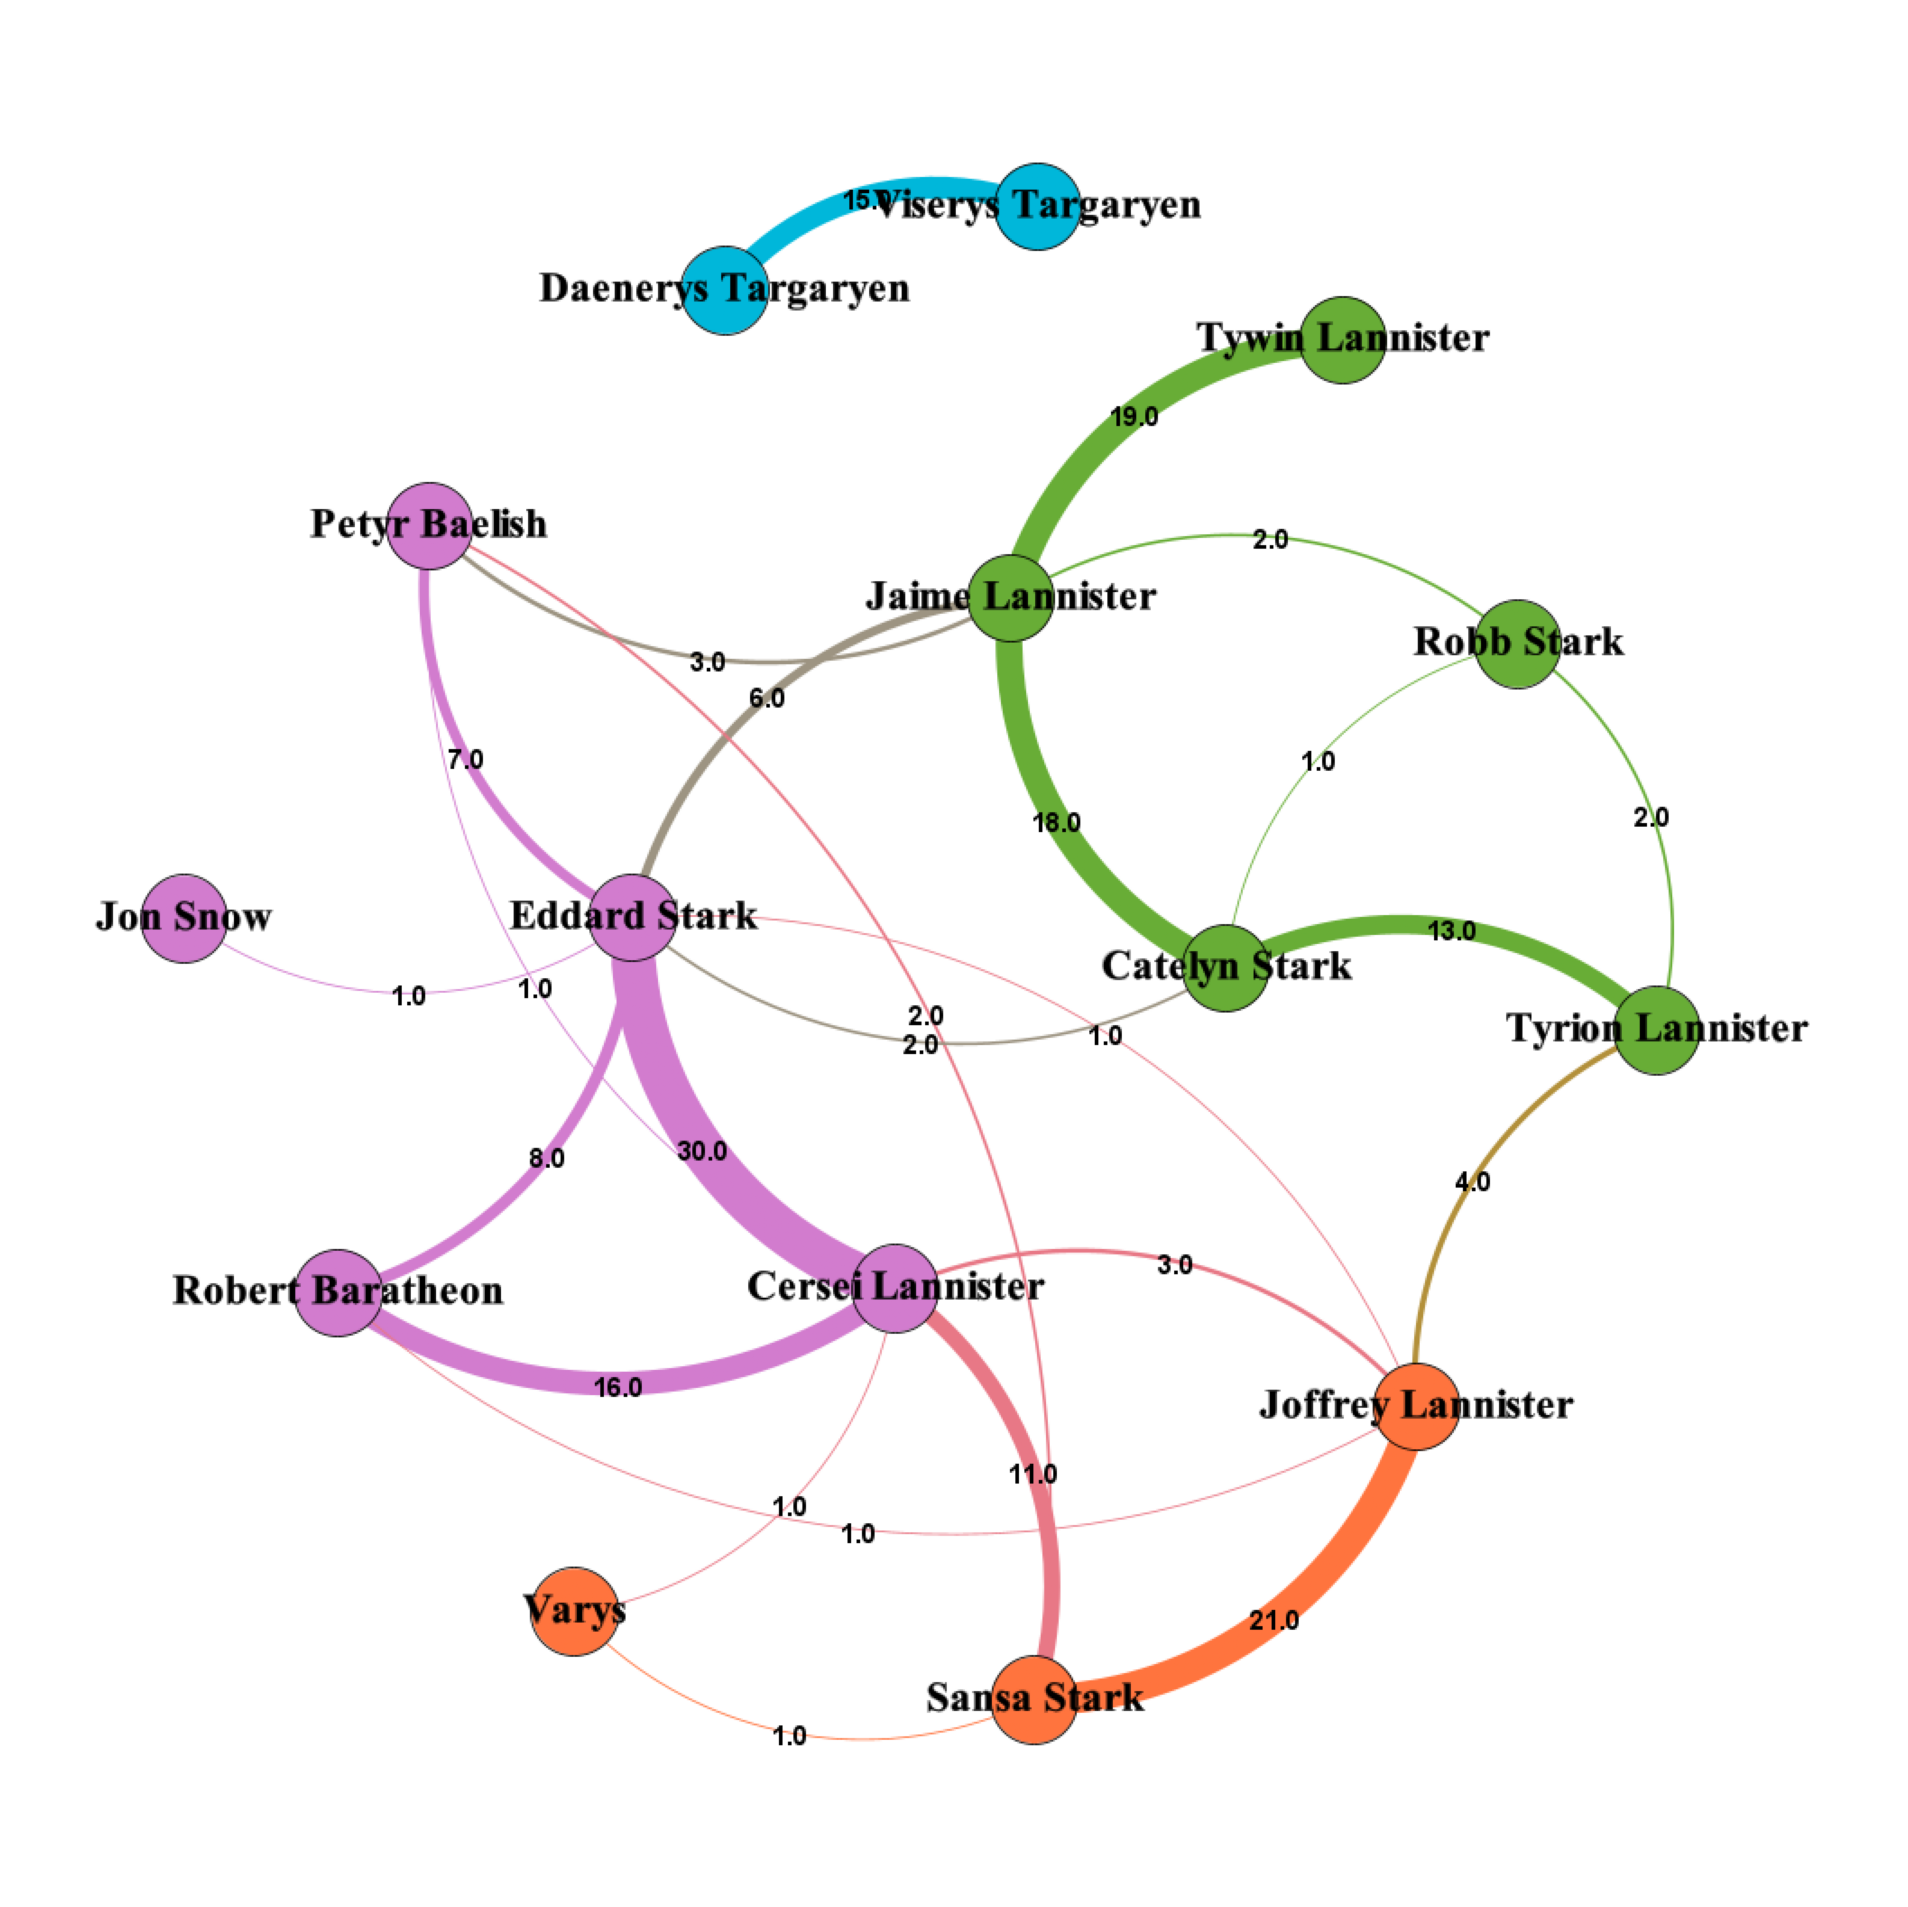

In [38]:
# Load and display the image
image_path = "conflict_network_gephi.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(img)
plt.axis("off")
plt.show()

For the above weighted Network graph , we could see that the **Eddard Stark** and **Cersei Lannister** had the most conflicts which resulted in the death sentence of Eddard Stark at the end of season 1.

The nodes are also **grouped together** based on their interactions with each other using the **modularity metrics** calculation.

---

**CONCLUSION:**

This study used network and sentiment analysis to examine  power  dynamics  in  Game  of  Thrones  Season  1.  A signed  character  network  highlighted  Eddard  Stark  as  the most  influential  figure,  while  conflict  analysis  revealed  the power  struggle  between  House  Stark  and  House  Lannister, culminating in Eddard’s execution and a shift in dominance toward the Lannisters.Sentiment analysis with VADER and manual annotation 
showed  that  characters  like  Eddard  Stark,  Jon  Snow  and Tyrion  had  predominantly  positive  sentiment,  while  Cersei and  Joffrey  exhibited  more  negative  sentiment,  reinforcing 
their roles. Combining network and sentiment analysis demonstrated how computational methods uncover narrative 
structures and power shifts.

---

**FUTURE WORK:**

Future work will focus on tracking power shifts over multiple seasons, applying machine learning techniques such as Random Forest classifiers  for  predictive  modeling  and  BERT-based  NLP models for sentiment trends. Additionally, interactive network visualizations in Gephi could improve interpretability of evolving alliances.

---

**APPLICATIONS:**

This framework applies to political leadership by analyzing speech  patterns,  sentiment  trends,  and  interaction networks. It can track influence, predict elections, model alliances, and forecast policy support based on sentiment shifts in discourse.

---